# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X_california.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [5]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
california['feature_names'] # nombres de los atributos para cada columna de 'data'


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
california['data']           # matriz con los datos de entrada (atributos)


array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
print(california['target']) # vector de valores a predecir

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [10]:
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [11]:
y.shape

(20640,)

In [12]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

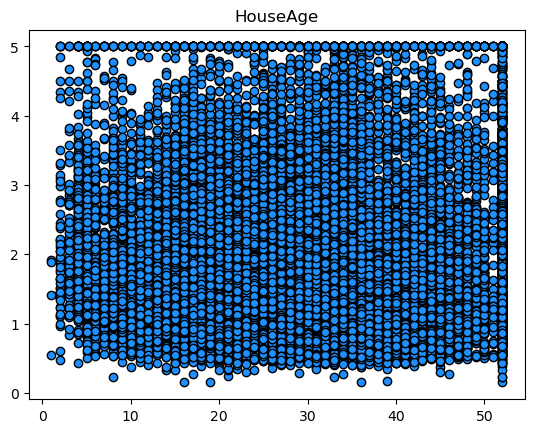

In [13]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'HouseAge'
selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [14]:
california['feature_names'][1] == feature

True

In [15]:
data=pd.DataFrame(california['data'], columns=[california['feature_names']])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Punto 1

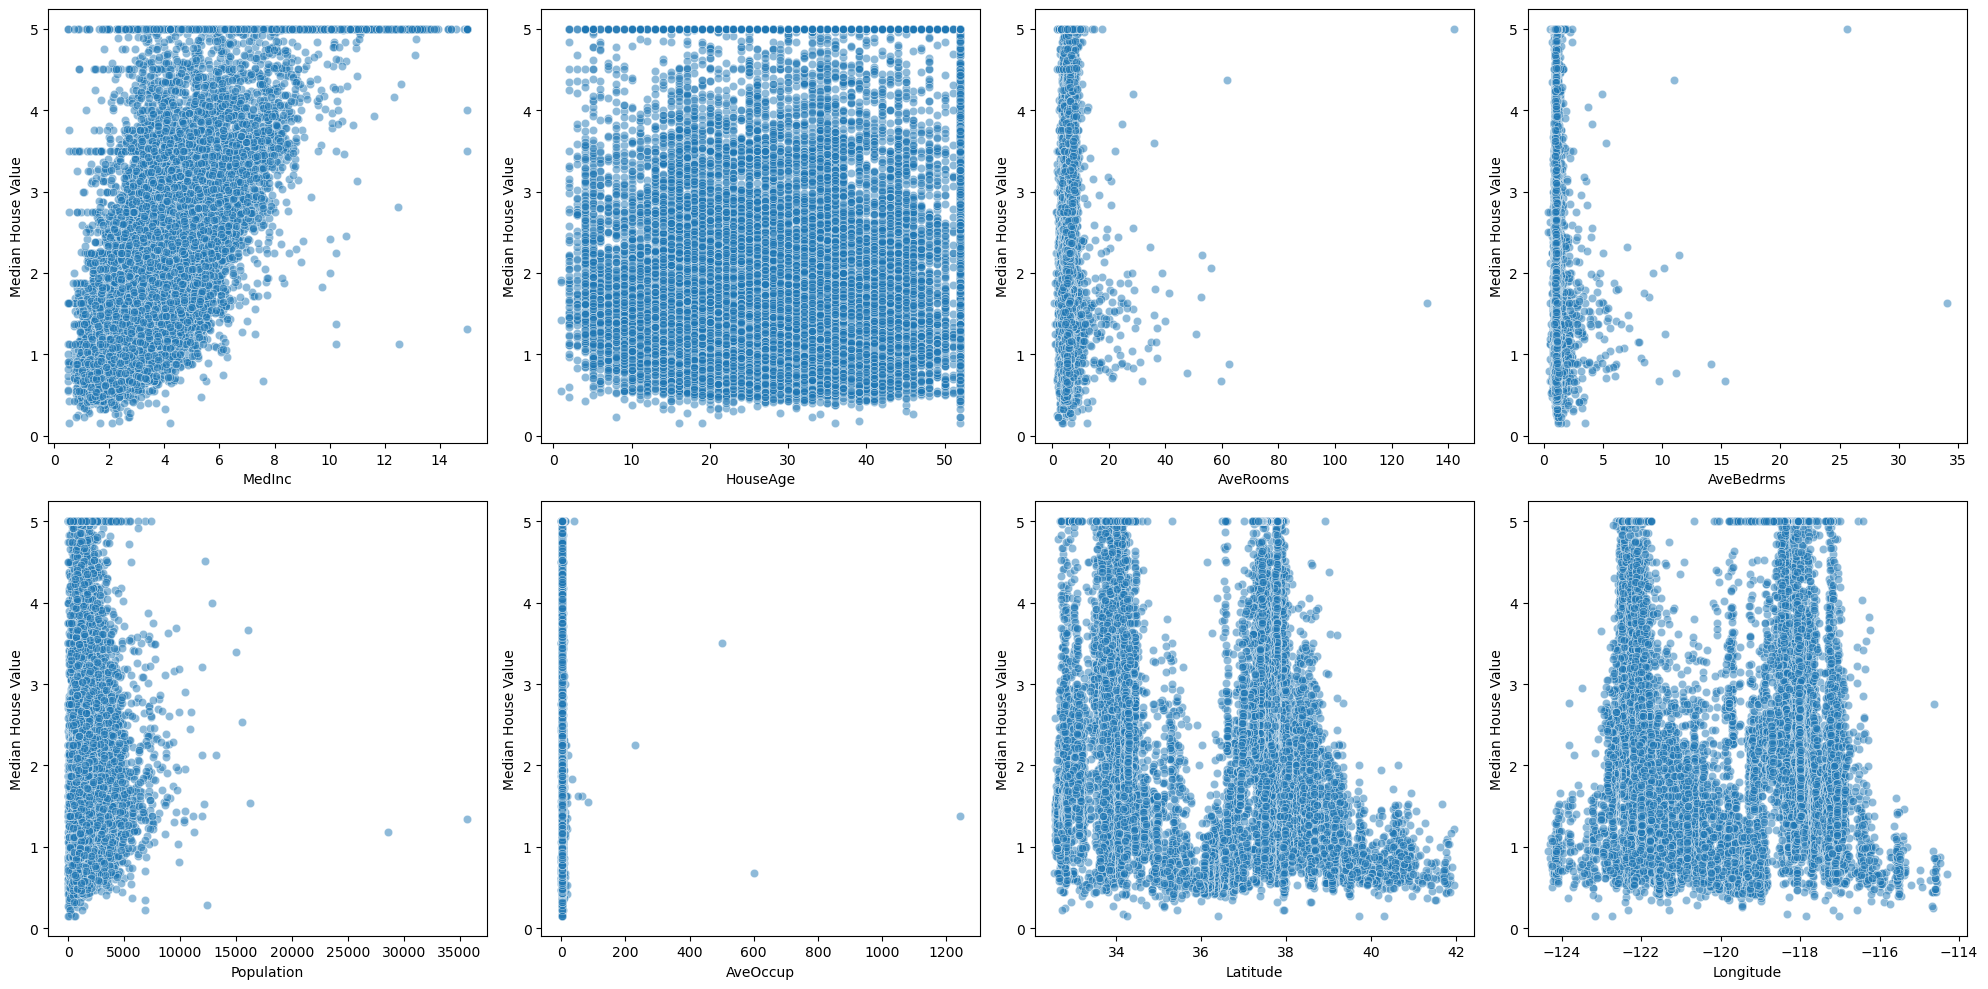

In [16]:
california = fetch_california_housing(as_frame=True)
X = california['data']
y = california['target']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, feature in enumerate(X.columns):
    sns.scatterplot(data=X, x=feature, y=y, ax=axs[i], alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Median House Value')

plt.tight_layout()
plt.show()

## Punto 2 y 3

a- Median Income: Muestra una relación positiva con la variable objetivo. A medida que el ingreso mediano aumenta, tiende a aumentar también el valor mediano de las casas.

b- AveRooms: Tambien tiene una relación positiva con la variable objetivo. A medida que el promedio de habitaciones por hogar aumenta, tiende a aumentar el valor mediano de las casas.

c- AveBedrms: Aunque la relación no es tan fuerte como la de los atributos anteriores, se puede observar una tendencia en la que un mayor promedio de dormitorios por hogar se asocia con un mayor valor mediano de las casas.

d- Latitude: Si bien no muestra una relación lineal clara, parece haber agrupamientos o patrones geográficos en relación con el valor mediano de las casas. Esto indica que la ubicación geográfica puede ser un factor importante en la predicción.

e- Longitude: Al igual que la latitud, este atributo muestra agrupamientos o patrones geográficos que pueden influir en el valor mediano de las casas. 



## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

Seleccionamos "Median Income" por su fuerte relación visual con la variable objetivo. 

In [17]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'  # selecciono el atributo 'HouseAge'
selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [18]:
X_train_f[1]

array([4.3898])

In [19]:

# Instanciar y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train_f, y_train)

LinearRegression()

In [20]:
# Predecir los valores para los conjuntos de entrenamiento y evaluación
y_train_pred = regression_model.predict(X_train_f)
y_test_pred = regression_model.predict(X_test_f)

# Calcular el error cuadrático medio
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Error cuadrático medio (Entrenamiento):", mse_train)
print("Error cuadrático medio (Evaluación):", mse_test)

Error cuadrático medio (Entrenamiento): 0.6960681099171515
Error cuadrático medio (Evaluación): 0.7214982234014606


En general, se puede observar que MedInc muestra el error cuadrático medio más bajo, lo que indica que puede ser la característica más óptima para predecir el valor objetivo. Sin embargo, es importante tener en cuenta que esta evaluación se basa únicamente en el error cuadrático medio y no considera otros factores, como la correlación entre las características y la relación con el valor objetivo. Por lo tanto, es recomendable realizar un análisis más exhaustivo y considerar diferentes métricas y técnicas para seleccionar la característica óptima en un modelo de regresión.

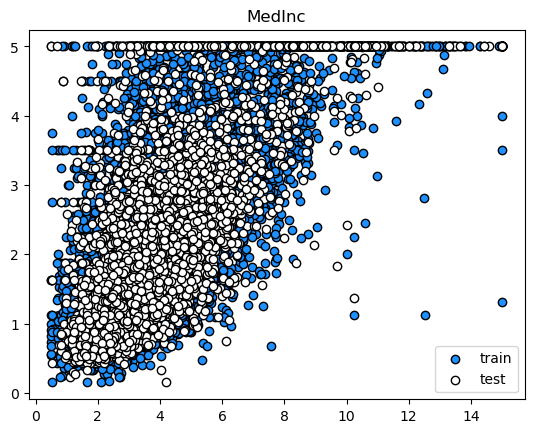

In [21]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

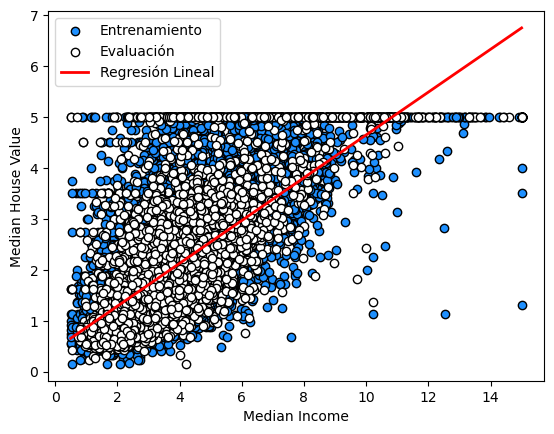

In [22]:
# Crear una línea para el modelo
x_line = np.linspace(X_train_f.min(), X_train_f.max(), 200)
y_line = regression_model.predict(x_line.reshape(-1, 1))

# Gráfica de dispersión con el modelo
plt.scatter(X_train_f, y_train, facecolor='dodgerblue', edgecolor="k",label='Entrenamiento')
plt.scatter(X_test_f, y_test, facecolor='white', edgecolor="k",label='Evaluación')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

El error cuadrático medio (MSE) se utiliza para evaluar el rendimiento del modelo. Un valor de MSE más bajo indica un mejor ajuste del modelo a los datos. Si se obtiene un error en la evaluación menor a 50, se considera un resultado satisfactorio.

La gráfica muestra los puntos de entrenamiento y evaluación junto con la línea de regresión lineal ajustada. Si la línea se ajusta bien a los datos y sigue una tendencia similar a los puntos, indica que el modelo ha capturado la relación entre el atributo seleccionado y la variable objetivo. Si la línea se desvía mucho de los puntos o muestra una tendencia diferente, el modelo puede no estar capturando adecuadamente la relación subyacente.

Es importante tener en cuenta que este análisis se basa en un único atributo y no considera el impacto de otros atributos en la predicción. Para obtener un modelo más completo, se recomienda realizar un análisis con múltiples atributos y utilizar técnicas de selección de características y validación cruzada para evaluar su rendimiento de manera más rigurosa.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




In [24]:
train_errors = []
test_errors = []
degrees = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [25]:
train_errors, test_errors

([1.3383715004003633,
  0.6960681099171515,
  0.6894859202345499,
  0.6782140838210796,
  0.6780518857896084,
  0.6780050101806554,
  0.6760874470470534,
  0.6737153167658617,
  0.6735525280245948,
  0.6735503011672793,
  0.6733338218258298,
  0.6732443144176818,
  0.6732716714786225,
  0.6732442692631379,
  0.6829114725585426,
  0.7564558046614251,
  1.2160367371653225,
  1.8184199819457916,
  2.8539947305543687,
  3.157666963278121],
 [1.3043431479307854,
  0.7214982234014606,
  0.7174074205923548,
  0.7081355393674345,
  0.7080431289121546,
  0.7079724319206923,
  0.7067678778874025,
  0.7025961076350921,
  0.7021037654411221,
  0.7020731232936003,
  0.702399536956588,
  0.7029320991960344,
  0.7027087340108079,
  0.7032415661912184,
  0.7122595403529834,
  0.8040843019108078,
  1.303765204466441,
  1.91869623524903,
  2.913352925402878,
  3.1700131435330134])

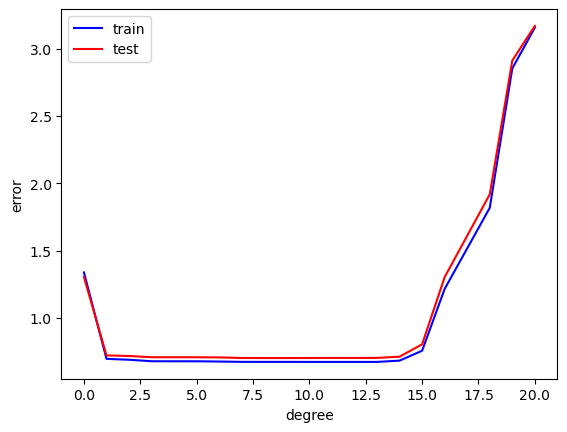

In [26]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Por lo que se ve en el grafico, cuando las líneas del modelo de entrenamiento y prueba siguen un recorrido similar en la gráfica, significa que el modelo está generalizando bien y no está sobreajustando ni subajustando los datos.

In [27]:
opt_degree = test_errors.index(min(test_errors))
opt_degree

9

In [28]:
pf2 = PolynomialFeatures(opt_degree)
lr2 = LinearRegression(fit_intercept=False)
model = make_pipeline(pf2, lr2)
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression(fit_intercept=False))])

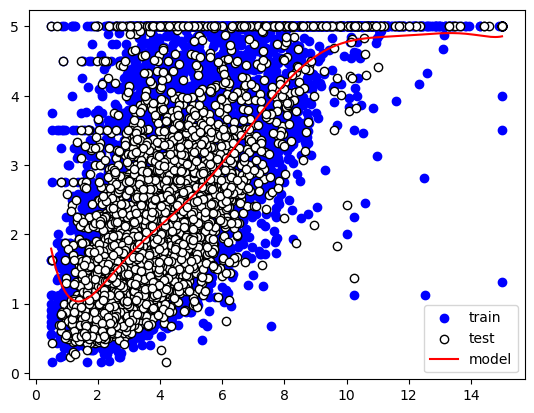

In [29]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

El modelo performa mucho mejor que utilizando la regresion lineal simple. Se obtiene un buen valor de RMSE para predecir a partir de un unico atributo.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [30]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'MedInc') | (np.array(california['feature_names']) == 'AveRooms') | (np.array(california['feature_names']) == 'AveOccup')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 3), (4128, 3))

In [31]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_fs, y_train)

LinearRegression()

In [32]:
y_train_pred = linear_regressor.predict(X_train_fs)
y_test_pred = linear_regressor.predict(X_test_fs)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

In [33]:
x_fs = data[['MedInc', 'AveRooms', 'AveOccup']]
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs, y, train_size=0.8, random_state=0)

In [34]:
def train_and_predict(degree, X_train, X_test, y_train, y_test):
    # Crear polinomios de grado 'degree'
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Entrenar modelo de regresión lineal
    linear_regression = LinearRegression()
    linear_regression.fit(X_train_poly, y_train)

    # Predecir en los conjuntos de entrenamiento y prueba
    y_train_pred = linear_regression.predict(X_train_poly)
    y_test_pred = linear_regression.predict(X_test_poly)

    # Calcular el error cuadrático medio
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return train_error, test_error

In [35]:
degrees=25
error_results= [train_and_predict(i,X_train_fs,X_test_fs,y_train_fs,y_test_fs)[0] for i in range (1,degrees)]
error_results

[0.6875234980668701,
 0.6421309363794622,
 0.5718577419567643,
 0.5300579389087342,
 0.5042264338289186,
 0.5099931508384012,
 1.237411726441714,
 0.966100668455811,
 2.020657605738612,
 1.2953838195708525,
 2.169551303235092,
 1.3370747260828935,
 1.8115715531218524,
 1.3410531805255466,
 2.212358508117662,
 1.4089012076548135,
 1.3404430265160323,
 1.7485730592800117,
 1.4373740280260099,
 1.3382578649769683,
 1.4546147307654627,
 1.3512973125075798,
 2.4178772494025496,
 1.3727184865631257]

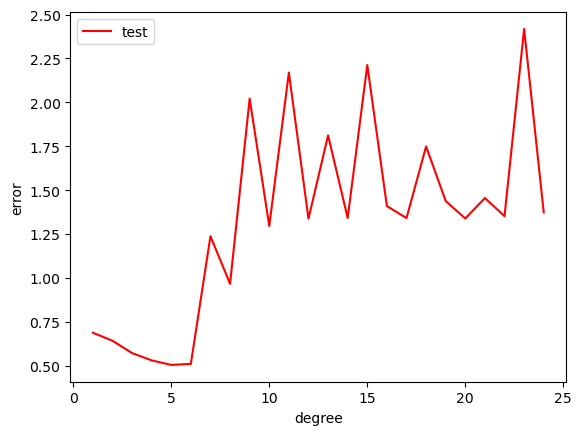

In [36]:
degrees_list=[i for i in range(1,degrees)]
plt.plot(degrees_list, error_results, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

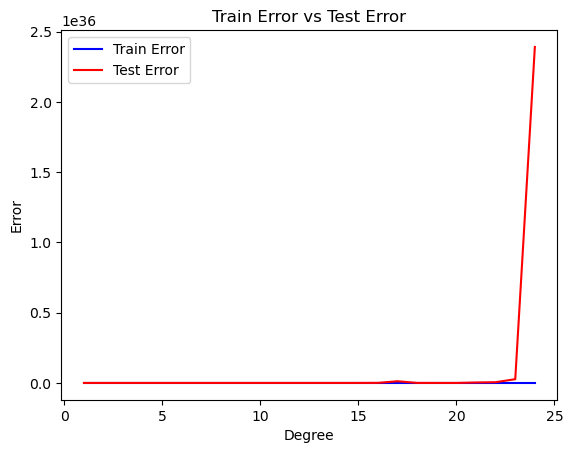

In [37]:
degrees = range(1, 25)
train_errors = []
test_errors = []

for degree in degrees:
    train_error, test_error = train_and_predict(degree, X_train_fs, X_test_fs, y_train_fs, y_test_fs)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(degrees, train_errors, color="blue", label="Train Error")
plt.plot(degrees, test_errors, color="red", label="Test Error")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Error")
plt.title("Train Error vs Test Error")
plt.show()

In [38]:
opt_degree_fs = error_results.index(min(train_errors))
opt_degree_fs

4

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.




In [39]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [40]:
linear_regressor_all = LinearRegression()

In [41]:
linear_regressor_all.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred_all = linear_regressor_all.predict(X_test)

In [44]:
mse_all = mean_squared_error(y_test, y_pred_all)

In [45]:
print("Mean Squared Error (All features):", mse_all)

Mean Squared Error (All features): 0.5289841670367227


Demora Mucho tiempo 

In [46]:
degrees = 10
error_results = [train_and_predict(i, X_train, X_test, y_train, y_test)[0] for i in range(1, degrees)]

In [47]:
error_results

[0.5234413607125448,
 0.4197000446847607,
 0.34853443367740333,
 0.32934736566507145,
 0.3450886016071648,
 0.48463575052473346,
 1.0961735259027736,
 1.1884808457036713,
 1.3144436388442704]

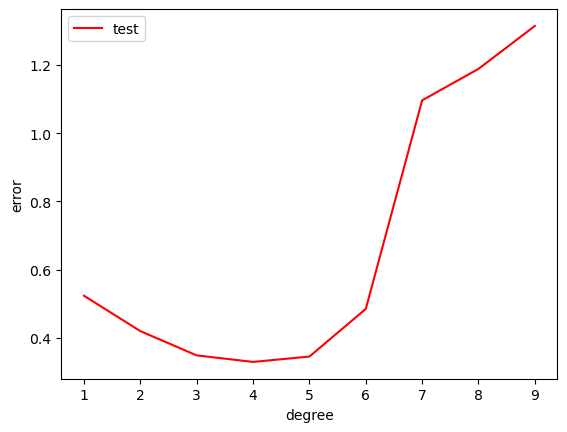

In [48]:
degrees_list=[i for i in range(1,degrees)]
plt.plot(degrees_list, error_results, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [49]:
alpha_coef=[0.0001,0.01, 0.1, 0.5,1, 5, 10, 50, 100]
for alpha in alpha_coef:
    clf=Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    print(metrics.mean_squared_error(y_test, predictions))

0.5289841690918325
0.5289843725484048
0.5289862222015392
0.5289944439196569
0.5290047234157986
0.5290870468034314
0.5291901391342108
0.5300171594064971
0.5310389507938524


El modelo de Ridge nos proporciono buenos resultados, bastantes parecidos con los diferentes coeficientes de regularizacion con los cuales experimentamos. Los valores del error cuadrático medio disminuyen a medida que aumenta el valor de alpha. Esto significa que a medida que se incrementa el valor de regularización, el modelo tiende a tener un rendimiento ligeramente peor en términos de ajuste a los datos.

Esto puede deberse a que, con valores más altos de alpha, el modelo se vuelve más restrictivo y penaliza más los coeficientes de las características. Esto puede conducir a un ajuste excesivo (overfitting) en el modelo, lo que resulta en un mayor error en los datos de prueba.